여러분은 왜 개 사료가 예상보다 빨리 상하게 되는지를 파악하기위해 개 사료 회사에 고용되었습니다. 안 좋은 소식은 이 회사는 한동안 장비를 업그레이드 하지 않았습니다. 즉, 이 회사에서 사용하는 5가지 방부제의 사용 용량이 중구난방이라는 뜻입니다. 하지만 그 중에서 가장 많은 영향을 끼치는 것이 무엇일까요?<br>
이 회사에서는 먼저 4가지 방부제(A, B, C, D)가 함유된 방부제 묶음을 섞은 뒤 '필러'라는 화학물질로 마무리합니다. 식품과학자들은 A, B, C, D 방부제 중 하나가 문제를 일으키고 있다고 생각하지만, 그게 어떤 것인지 명확하게 하기위해 여러분이 고용됐습니다. "랜덤포레스트"로 어떤 방부제가 사료를 빨리 상하게 하는지 찾아보세요!

- Pres_A : 혼합물의 A비율
- Pres_B : 혼합물의 B비율
- Pres_C : 혼합물의 C비율
- Pres_D : 혼합물의 D비율
- Spoiled : 개 사료가 상했는지 여부를 나타내는 레이블.

**시나리오에서 요구하는 바를 고려하여, 머신러닝을 이용해서 문제를 풀어보세요.**

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report

In [151]:
# 데이터 불러오기
df = pd.read_csv("./data/dog_food.csv")

In [129]:
df.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


In [105]:
df.shape

(490, 5)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A        490 non-null    int64  
 1   B        490 non-null    int64  
 2   C        490 non-null    float64
 3   D        490 non-null    int64  
 4   Spoiled  490 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.3 KB


In [141]:
df.describe()

,A,B,C,D,Spoiled
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,5.534694,5.504082,9.126531,5.579592,0.285714
std,2.951520,2.853797,2.055545,2.854837,0.452216
min,1.000000,1.000000,5.000000,1.000000,0.000000
25%,3.000000,3.000000,8.000000,3.000000,0.000000
50%,5.000000,6.000000,9.000000,6.000000,0.000000
75%,8.000000,8.000000,11.000000,8.000000,1.000000
max,10.000000,10.000000,14.000000,10.000000,1.000000


In [135]:
# 데이터 분리
x = df.drop("Spoiled", axis = 1)
y = df["Spoiled"]

In [153]:
# 훈련-테스트 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 26)

In [155]:
# 모델 정의
rf = RandomForestClassifier(n_jobs = -1, random_state = 26)

In [185]:
# 교차 검증
scores = cross_validate(rf, x_train, y_train, return_train_score = True, n_jobs = -1)
scores

{'fit_time': array([0.12704468, 0.1274581 , 0.12938166, 0.13181472, 0.1292274 ]),
 'score_time': array([0.0173943 , 0.01862359, 0.01818776, 0.01899838, 0.01844144]),
 'test_score': array([0.98734177, 0.98734177, 0.93589744, 0.98717949, 1.        ]),
 'train_score': array([0.99680511, 0.99680511, 1.        , 0.99681529, 0.99681529])}

In [161]:
# 평균 성능 출력
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]), np.mean(scores["fit_time"]))

0.997448159378116 0.9795520934761441 0.18962197303771972


In [165]:
# 전체 훈련 데이터로 모델 학습
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=26)

In [177]:
# 테스트 예측 및 평가
y_pred = rf.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [181]:
# print(classification_report(y_test, y_pred))

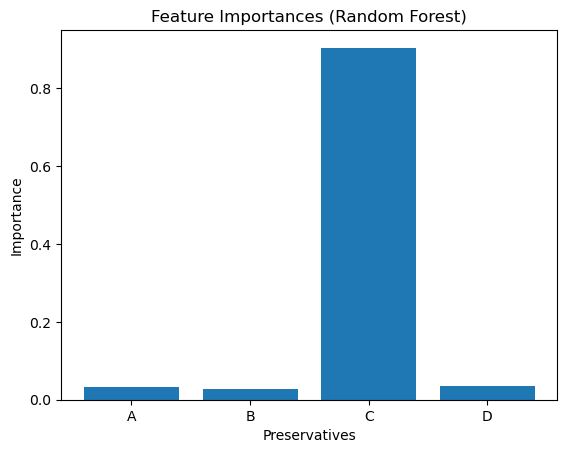

In [183]:
# 특성 중요도 시각화
importances = rf.feature_importances_
features = x.columns

plt.figure()
plt.bar(features, importances)

plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.xlabel("Preservatives")

plt.show()

- **방부제 C**가 사료를 상하게 하는 데 가장 큰 영향을 미치는 것으로 보인다.
- `RandomForestClassifier`의 `feature_importances_`를 분석한 결과, 방부제 C의 중요도가 가장 높게 나왔다.